# KEGG access

Let´s access the KEGG information through two approaches: Biopython and Bioservices

It´s usefull if you´re a python user. 

I will teach you how to fetch genes, pathways, reactions and other information from KEGG pathways in python.
    

## 1. Biopython

Biopython is a set of freely available tools for biological computation written in Python by an international team of developers.

https://biopython.org/

In [1]:
#!pip install biopython
#!pip install reportlab

In [2]:
#Biopython modules to interact with KEGG
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

# Import Pandas for dataframes
import pandas as pd
import io

%matplotlib inline
from IPython.display import Image

### Use

The available functions are:

    kegg_conv() - convert identifiers from KEGG to those for other databases
    kegg_find() - find KEGG entries with matching query data
    kegg_get() - retrieve data for a specific entry from KEGG
    kegg_info() - get information about a KEGG database
    kegg_link() - find entries in KEGG using a database cross-reference
    kegg_list() - list entries in a a database

The generic form of using these functions to get information from KEGG and place the output in the variable myvar is:

myvar = REST.\<function>(\<query>, \<arg1>, \<arg2>, `...`).read()


In [3]:
# Perform the query
result = REST.kegg_info("kegg").read()

# Print the result
print(result)

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 102.0+/05-25, May 22
                 Kanehisa Laboratories
                 pathway     926,689 entries
                 brite       314,323 entries
                 module          534 entries
                 orthology    25,155 entries
                 genome        8,458 entries
                 genes     41,721,579 entries
                 compound     18,922 entries
                 glycan       11,084 entries
                 reaction     11,773 entries
                 rclass        3,177 entries
                 enzyme        7,962 entries
                 network       1,366 entries
                 variant         456 entries
                 disease       2,561 entries
                 drug         11,910 entries
                 dgroup        2,389 entries



In [4]:
# Print information about the PATHWAY database
result = REST.kegg_info("pathway").read()
print(result)



pathway          KEGG Pathway Database
path             Release 102.0+/05-25, May 22
                 Kanehisa Laboratories
                 926,689 entries

linked db        module
                 ko
                 genome
                 <org>
                 compound
                 glycan
                 reaction
                 rclass
                 enzyme
                 network
                 disease
                 drug
                 pubmed



In [5]:
# Print information about S.cerevisiae
result = REST.kegg_info("sce").read()
print(result)



T00005           Saccharomyces cerevisiae (budding yeast) KEGG Genes Database
sce              Release 102.0+/05-25, May 22
                 Kanehisa Laboratories
                 6,436 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 sgd
                 enzyme
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



In [6]:
# Get all entries in the PATHWAY database as a dataframe
result = REST.kegg_list("pathway").read()
pd.read_table(io.StringIO(result), header=None)



,0,1
0,path:map00010,Glycolysis / Gluconeogenesis
1,path:map00020,Citrate cycle (TCA cycle)
2,path:map00030,Pentose phosphate pathway
3,path:map00040,Pentose and glucuronate interconversions
4,path:map00051,Fructose and mannose metabolism
...,...,...
546,path:map07231,Sodium channel blocking drugs
547,path:map07232,Potassium channel blocking and opening drugs
548,path:map07233,Ion transporter inhibitors
549,path:map07234,Neurotransmitter transporter inhibitors


In [7]:
# Get all entries in the PATHWAY database for S. cerevisiae as a dataframe
result = REST.kegg_list("pathway", "sce").read()
pd.read_table(io.StringIO(result), header=None)



,0,1
0,path:sce00010,Glycolysis / Gluconeogenesis - Saccharomyces c...
1,path:sce00020,Citrate cycle (TCA cycle) - Saccharomyces cere...
2,path:sce00030,Pentose phosphate pathway - Saccharomyces cere...
3,path:sce00040,Pentose and glucuronate interconversions - Sac...
4,path:sce00051,Fructose and mannose metabolism - Saccharomyce...
...,...,...
115,path:sce04144,Endocytosis - Saccharomyces cerevisiae (buddin...
116,path:sce04145,Phagosome - Saccharomyces cerevisiae (budding ...
117,path:sce04146,Peroxisome - Saccharomyces cerevisiae (budding...
118,path:sce04213,Longevity regulating pathway - multiple specie...


In [8]:
# Get all genes from S. cerevisiae as a dataframe
result = REST.kegg_list("sce").read()
pd.read_table(io.StringIO(result), header=None)



,0,1
0,sce:YAL068C,PAU8; seripauperin PAU8
1,sce:YAL067W-A,uncharacterized protein
2,sce:YAL067C,SEO1; putative permease SEO1
3,sce:YAL065C,uncharacterized protein
4,sce:YAL064W-B,uncharacterized protein
...,...,...
6431,sce:tT_UAG_Q2,tT(UAG)Q2; tRNA-Thr
6432,sce:tV_UAC_Q,tV(UAC)Q; tRNA-Val
6433,sce:Q0275,"COX3, OXI2; cytochrome c oxidase subunit 3"
6434,sce:tM_CAU_Q2,tM(CAU)Q2; tRNA-fMet


In [9]:
# Find a specific entry with a precise search term
result = REST.kegg_find("genes", "sce:YAL067C").read()
pd.read_table(io.StringIO(result), header=None)



,0,1
0,sce:YAL067C,SEO1; putative permease SEO1


In [10]:
# Find all ethanol genes
# You may search by a specific term. Will return for all organisms
result = REST.kegg_find("genes", "ethanol").read()
pd.read_table(io.StringIO(result), header=None)

,0,1
0,hsa:162466,PHOSPHO1; phosphoethanolamine/phosphocholine p...
1,hsa:117245,"PLAAT5, HRASLS5, HRLP5, HRSL5, PLAAT-5, RLP1, ..."
2,hsa:85465,"SELENOI, EPT1, SELI, SEPI, SPG81; selenoprotein I"
3,hsa:1119,"CHKA, CHK, CK, CKI, EK; choline kinase alpha"
4,hsa:10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT; phospha..."
...,...,...
9995,adf:107347097,phosphoethanolamine N-methyltransferase 1-like
9996,adf:107347758,ethanolamine-phosphate cytidylyltransferase-like
9997,adf:107348271,GPI ethanolamine phosphate transferase 3-like
9998,adf:107349498,choline/ethanolaminephosphotransferase 1-like


In [11]:
# Find all ethanol genes
# You may search by an especific term. Will return for all S. cerevisiae
result = REST.kegg_find("sce", "ethanol").read()
pd.read_table(io.StringIO(result), header=None)

,0,1
0,sce:YDR147W,EKI1; bifunctional choline kinase/ethanolamine...
1,sce:YDR182W,"CDC1, DSC1, DSR1, ESP2; putative lipid phospha..."
2,sce:YDR302W,GPI11; mannose-ethanolamine phosphotransferase...
3,sce:YGR007W,"ECT1, MUQ1; ethanolamine-phosphate cytidylyltr..."
4,sce:YGR157W,"CHO2, PEM1; phosphatidylethanolamine N-methylt..."
5,sce:YHR123W,EPT1; bifunctional diacylglycerol cholinephosp...
6,sce:YJL062W,"LAS21, GPI7; mannose-ethanolamine phosphotrans..."
7,sce:YJR073C,"OPI3, PEM2; bifunctional phosphatidyl-N-methyl..."
8,sce:YKL165C,"MCD4, FSR2, SSU21, ZRG16; mannose-ethanolamine..."
9,sce:YLL031C,"GPI13, MPC1; mannose-ethanolamine phosphotrans..."


In [12]:
# Get the entry information for cpd:C00469 (ethanol)
result = REST.kegg_get("cpd:C00469").read()
print(result)



ENTRY       C00469                      Compound
NAME        Ethanol;
            Ethyl alcohol;
            Methylcarbinol
FORMULA     C2H6O
EXACT_MASS  46.0419
MOL_WEIGHT  46.0684
REMARK      Same as: D00068 D02798 D04855 D06542
REACTION    R00746 R00754 R02359 R02682 R04410 R05198 R09127 R09479 
            R09552 R11957 R12515
PATHWAY     map00010  Glycolysis / Gluconeogenesis
            map00620  Pyruvate metabolism
            map01100  Metabolic pathways
            map01110  Biosynthesis of secondary metabolites
            map01120  Microbial metabolism in diverse environments
            map04750  Inflammatory mediator regulation of TRP channels
            map04936  Alcoholic liver disease
            map05034  Alcoholism
            map05208  Chemical carcinogenesis - reactive oxygen species
ENZYME      1.1.1.1         1.1.1.2         1.1.1.71        1.1.2.7         
            1.1.2.8         1.1.5.5         1.1.99.36       2.3.1.152       
            2.3.1.268       3.

In [13]:
# Get entry information for KSE_17560
result = REST.kegg_get("sce:YAL067C").read()
print(result)



ENTRY       YAL067C           CDS       T00005
SYMBOL      SEO1
NAME        (RefSeq) putative permease SEO1
ORGANISM    sce  Saccharomyces cerevisiae (budding yeast)
POSITION    I:complement(7235..9016)
MOTIF       Pfam: MFS_1
DBLINKS     NCBI-GeneID: 851230
            NCBI-ProteinID: NP_009333
            SGD: S000000062
            UniProt: P39709
AASEQ       593
            MYSIVKEIIVDPYKRLKWGFIPVKRQVEDLPDDLNSTEIVTISNSIQSHETAENFITTTS
            EKDQLHFETSSYSEHKDNVNVTRSYEYRDEADRPWWRFFDEQEYRINEKERSHNKWYSWF
            KQGTSFKEKKLLIKLDVLLAFYSCIAYWVKYLDTVNINNAYVSGMKEDLGFQGNDLVHTQ
            VMYTVGNIIFQLPFLIYLNKLPLNYVLPSLDLCWSLLTVGAAYVNSVPHLKAIRFFIGAF
            EAPSYLAYQYLFGSFYKHDEMVRRSAFYYLGQYIGILSAGGIQSAVYSSLNGVNGLEGWR
            WNFIIDAIVSVVVGLIGFYSLPGDPYNCYSIFLTDDEIRLARKRLKENQTGKSDFETKVF
            DIKLWKTIFSDWKIYILTLWNIFCWNDSNVSSGAYLLWLKSLKRYSIPKLNQLSMITPGL
            GMVYLMLTGIIADKLHSRWFAIIFTQVFNIIGNSILAAWDVAEGAKWFAFMLQCFGWAMA
            PVLYSWQNDICRRDAQTRAITLVTMNIMAQSSTAW

In [14]:
# Get coding sequence for YAL067C
result = REST.kegg_get("sce:YAL067C", "ntseq").read()
print(result)




>sce:YAL067C no KO assigned | (RefSeq) SEO1; putative permease SEO1 (N)
atgtattcaattgttaaagagattattgtagatccttacaaaagactaaaatggggtttt
attccagtaaagcggcaggtggaagacctgccagatgacttaaattcaacagaaattgtc
actatctccaacagtatccagagtcatgaaacagctgaaaatttcatcacgactacaagt
gaaaaagatcaactacattttgagactagtagctatagtgaacataaagacaatgtgaac
gttactagaagttatgaatatagagatgaagccgataggccatggtggagatttttcgat
gaacaagagtatcggatcaatgaaaaggaaagatctcacaataaatggtatagttggttc
aaacagggtacctctttcaaagaaaaaaaattattaattaaattggatgtccttttagcc
ttttattcttgtattgcttattgggtgaaatatctggatacggttaatataaacaacgct
tacgtttcgggaatgaaggaagatttaggctttcaaggtaatgatttggtgcatactcaa
gtaatgtacacagttggtaatattatatttcaattgccatttttgatttacctgaacaag
ctcccattaaactatgttttaccaagcctcgacttatgttggtcgcttttaaccgttggt
gctgcatatgtcaattctgtaccacacttgaaagcaattaggtttttcattggggctttt
gaagcgccaagttatttggcataccaatatttgtttggttccttttacaaacatgatgaa
atggtgcgtcgttctgctttttactatttgggccagtatatcggtattctatccgctggt
gggatccagtcagccgtatattcatcgttaaatggtgtaaatggtttagagggatggaga
tggaactttatta

In [15]:
# Get protein sequence for YAL067C
result = REST.kegg_get("sce:YAL067C", "aaseq").read()
print(result)

>sce:YAL067C no KO assigned | (RefSeq) SEO1; putative permease SEO1 (A)
MYSIVKEIIVDPYKRLKWGFIPVKRQVEDLPDDLNSTEIVTISNSIQSHETAENFITTTS
EKDQLHFETSSYSEHKDNVNVTRSYEYRDEADRPWWRFFDEQEYRINEKERSHNKWYSWF
KQGTSFKEKKLLIKLDVLLAFYSCIAYWVKYLDTVNINNAYVSGMKEDLGFQGNDLVHTQ
VMYTVGNIIFQLPFLIYLNKLPLNYVLPSLDLCWSLLTVGAAYVNSVPHLKAIRFFIGAF
EAPSYLAYQYLFGSFYKHDEMVRRSAFYYLGQYIGILSAGGIQSAVYSSLNGVNGLEGWR
WNFIIDAIVSVVVGLIGFYSLPGDPYNCYSIFLTDDEIRLARKRLKENQTGKSDFETKVF
DIKLWKTIFSDWKIYILTLWNIFCWNDSNVSSGAYLLWLKSLKRYSIPKLNQLSMITPGL
GMVYLMLTGIIADKLHSRWFAIIFTQVFNIIGNSILAAWDVAEGAKWFAFMLQCFGWAMA
PVLYSWQNDICRRDAQTRAITLVTMNIMAQSSTAWISVLVWKTEEAPRYLKGFTFTACSA
FCLSIWTFVVLYFYKRDERNNAKKNGIVLYNSKHGVEKPTSKDVETLSVSDEK



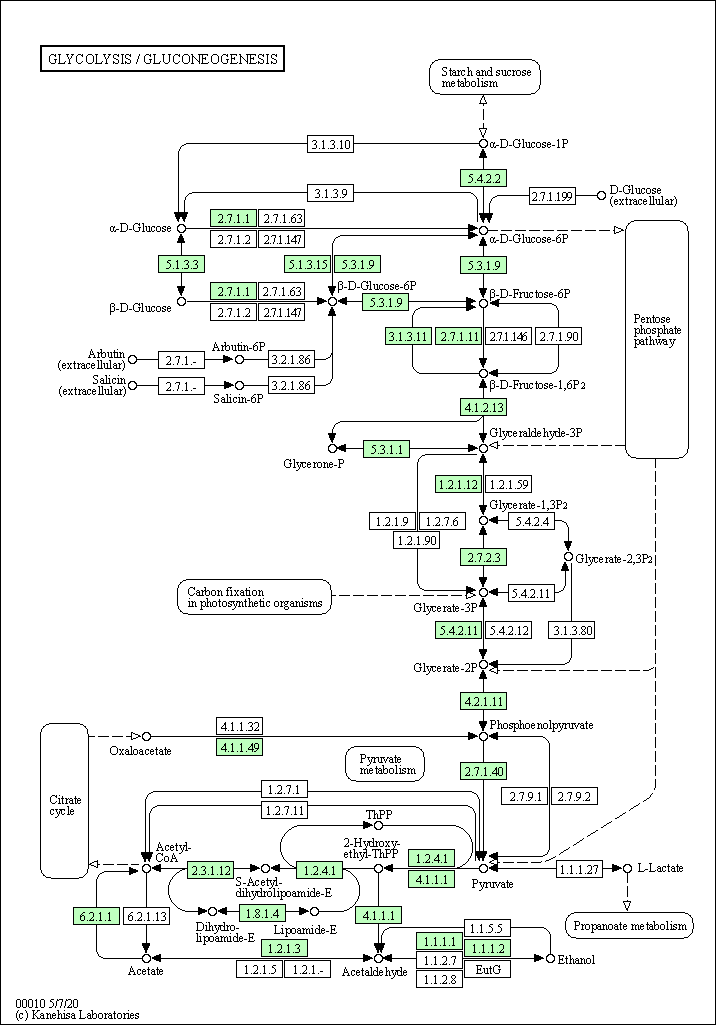

In [16]:
# Get map of glycolysis
result = REST.kegg_get("sce00010", "image").read()
Image(result)



In [17]:
# Get data for glycolysis in S. ceevisiae
result = REST.kegg_get("sce00010").read()
print(result)


ENTRY       sce00010                    Pathway
NAME        Glycolysis / Gluconeogenesis - Saccharomyces cerevisiae (budding yeast)
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose f

In [18]:
# Get genes involved with glycolysis map
result = REST.kegg_link("compound", "map00010").read()
pd.read_table(io.StringIO(result), header=None)



,0,1
0,path:map00010,cpd:C00022
1,path:map00010,cpd:C00024
2,path:map00010,cpd:C00031
3,path:map00010,cpd:C00033
4,path:map00010,cpd:C00036
5,path:map00010,cpd:C00068
6,path:map00010,cpd:C00074
7,path:map00010,cpd:C00084
8,path:map00010,cpd:C00103
9,path:map00010,cpd:C00111


In [19]:
# Get reactions involved with glycolysis
# find maps here: https://www.genome.jp/kegg/pathway.html
result = REST.kegg_link("rn", "map00010").read()
pd.read_table(io.StringIO(result), header=None)

,0,1
0,path:map00010,rn:R00014
1,path:map00010,rn:R00199
2,path:map00010,rn:R00200
3,path:map00010,rn:R00206
4,path:map00010,rn:R00229
5,path:map00010,rn:R00235
6,path:map00010,rn:R00341
7,path:map00010,rn:R00431
8,path:map00010,rn:R00658
9,path:map00010,rn:R00703


In [20]:
# Get reactions R09085
result = REST.kegg_get("R09085").read()
print(result)

ENTRY       R09085                      Reaction
NAME        ADP:D-glucose 6-phosphotransferase
DEFINITION  alpha-D-Glucose + ADP <=> alpha-D-Glucose 6-phosphate + AMP
EQUATION    C00267 + C00008 <=> C00668 + C00020
RCLASS      RC00002  C00008_C00020
            RC00017  C00267_C00668
ENZYME      2.7.1.147
PATHWAY     rn00010  Glycolysis / Gluconeogenesis
            rn01100  Metabolic pathways
            rn01110  Biosynthesis of secondary metabolites
            rn01120  Microbial metabolism in diverse environments
            rn01200  Carbon metabolism
MODULE      M00001  Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate
ORTHOLOGY   K00918  ADP-dependent phosphofructokinase/glucokinase [EC:2.7.1.146 2.7.1.147]
            K08074  ADP-dependent glucokinase [EC:2.7.1.147]
///



In [21]:
# Get EC numbers involved with glycolysis
# find maps here: https://www.genome.jp/kegg/pathway.html
result = REST.kegg_link("ec", "map00010").read()
pd.read_table(io.StringIO(result), header=None)

,0,1
0,path:map00010,ec:1.1.1.1
1,path:map00010,ec:1.1.1.2
2,path:map00010,ec:1.1.1.27
3,path:map00010,ec:1.1.2.7
4,path:map00010,ec:1.1.2.8
5,path:map00010,ec:1.1.5.5
6,path:map00010,ec:1.2.1.12
7,path:map00010,ec:1.2.1.3
8,path:map00010,ec:1.2.1.5
9,path:map00010,ec:1.2.1.59


In [22]:
# KO version (KEGG orthologues)
result = REST.kegg_get("ko00061").read()   
pd.read_table(io.StringIO(result), header=None)


,0
0,ENTRY ko00061 Pathway
1,NAME Fatty acid biosynthesis
2,CLASS Metabolism; Lipid metabolism
3,PATHWAY_MAP ko00061 Fatty acid biosynthesis
4,"MODULE M00082 Fatty acid biosynthesis, i..."
...,...
151,ko00561 Glycerolipid metabolism
152,ko00564 Glycerophospholipid metab...
153,ko00620 Pyruvate metabolism
154,ko00785 Lipoic acid metabolism


In [23]:
res=REST.kegg_get("sce00010").read()
print(res)

ENTRY       sce00010                    Pathway
NAME        Glycolysis / Gluconeogenesis - Saccharomyces cerevisiae (budding yeast)
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose f

In [24]:
# for obtain the genes corresponding to the pathways through text analysis.
# we need to get the results for a specific pathway and run over it

pathways = ["sce00010"]
genes = []

for pathway in pathways:
    #pathways[pathway]['geneid'] = set(); 
    #pathways[pathway]['gene_symbol'] = set()
    pathway_file = REST.kegg_get(pathway).read()  # query and read each pathway
    # iterate through each KEGG pathway file, keeping track of which section
    # of the file we're in, only read the gene in each pathway
    current_section = None
    for line in pathway_file.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if not section == "":
            current_section = section
        if current_section == "GENE":
            try:
                gene_identifiers, _ = line[12:].split("; ")[:2]
                geneid, gene_symbol = gene_identifiers.split()
                #pathways[pathway]['geneid'].add(int(geneid))
                #pathways[pathway]['gene_symbol'].add(gene_symbol)
                genes.append(geneid)
            except: pass 

In [25]:
genes

['YGL253W',
 'YFR053C',
 'YCL040W',
 'YDR516C',
 'YBR196C',
 'YMR205C',
 'YGR240C',
 'YLR377C',
 'YKL060C',
 'YDR050C',
 'YGR192C',
 'YJL052W',
 'YJR009C',
 'YCR012W',
 'YDL021W',
 'YKL152C',
 'YOL056W',
 'YMR323W',
 'YGR254W',
 'YHR174W',
 'YOR393W',
 'YPL281C',
 'YAL038W',
 'YOR347C',
 'YER178W',
 'YBR221C',
 'YNL071W',
 'YFL018C',
 'YDL080C',
 'YGR087C',
 'YLR044C',
 'YLR134W',
 'YDL168W',
 'YOL086C',
 'YMR303C',
 'YBR145W',
 'YMR083W',
 'YGL256W',
 'YCR105W',
 'YMR318C',
 'YOR374W',
 'YPL061W',
 'YER073W',
 'YMR110C',
 'YMR169C',
 'YMR170C',
 'YAL054C',
 'YLR153C',
 'YBR019C',
 'YMR105C',
 'YKL127W',
 'YMR278W',
 'YKR097W']

## 2. Bioservices

Bioservices is a Python package that provides access to many Bioinformatices Web Services (e.g., UniProt) and a framework to easily implement Web Services wrappers (based on WSDL/SOAP or REST protocols).

https://github.com/cokelaer/bioservices



In [26]:
#!pip install bioservices

In [27]:
from bioservices.kegg import KEGG
k = KEGG()

In [28]:
#show organisms in KEGG and the id symbol (ex. Homo sapiens = hsa)

print(k.list("organism"))

T01001	hsa	Homo sapiens (human)	Eukaryotes;Animals;Vertebrates;Mammals
T01005	ptr	Pan troglodytes (chimpanzee)	Eukaryotes;Animals;Vertebrates;Mammals
T02283	pps	Pan paniscus (bonobo)	Eukaryotes;Animals;Vertebrates;Mammals
T02442	ggo	Gorilla gorilla gorilla (western lowland gorilla)	Eukaryotes;Animals;Vertebrates;Mammals
T01416	pon	Pongo abelii (Sumatran orangutan)	Eukaryotes;Animals;Vertebrates;Mammals
T03265	nle	Nomascus leucogenys (northern white-cheeked gibbon)	Eukaryotes;Animals;Vertebrates;Mammals
T01028	mcc	Macaca mulatta (rhesus monkey)	Eukaryotes;Animals;Vertebrates;Mammals
T02918	mcf	Macaca fascicularis (crab-eating macaque)	Eukaryotes;Animals;Vertebrates;Mammals
T04361	csab	Chlorocebus sabaeus (green monkey)	Eukaryotes;Animals;Vertebrates;Mammals
T07242	caty	Cercocebus atys (sooty mangabey)	Eukaryotes;Animals;Vertebrates;Mammals
T07474	panu	Papio anubis (olive baboon)	Eukaryotes;Animals;Vertebrates;Mammals
T08041	tge	Theropithecus gelada (gelada)	Eukaryotes;Animals;Vertebrate

In [29]:
#sey an organism
k.organism = "sce"


In [30]:
#show all pathways from S. cerevisiae
k.pathwayIds

['path:sce00010',
 'path:sce00020',
 'path:sce00030',
 'path:sce00040',
 'path:sce00051',
 'path:sce00052',
 'path:sce00053',
 'path:sce00061',
 'path:sce00062',
 'path:sce00071',
 'path:sce00100',
 'path:sce00130',
 'path:sce00190',
 'path:sce00220',
 'path:sce00230',
 'path:sce00240',
 'path:sce00250',
 'path:sce00260',
 'path:sce00261',
 'path:sce00270',
 'path:sce00280',
 'path:sce00290',
 'path:sce00300',
 'path:sce00310',
 'path:sce00330',
 'path:sce00332',
 'path:sce00340',
 'path:sce00350',
 'path:sce00360',
 'path:sce00380',
 'path:sce00400',
 'path:sce00410',
 'path:sce00430',
 'path:sce00440',
 'path:sce00450',
 'path:sce00460',
 'path:sce00470',
 'path:sce00480',
 'path:sce00500',
 'path:sce00510',
 'path:sce00511',
 'path:sce00513',
 'path:sce00514',
 'path:sce00515',
 'path:sce00520',
 'path:sce00561',
 'path:sce00562',
 'path:sce00563',
 'path:sce00564',
 'path:sce00565',
 'path:sce00590',
 'path:sce00592',
 'path:sce00600',
 'path:sce00620',
 'path:sce00630',
 'path:sce

In [31]:
# print a pathway sce00010 (glycolysis) from S. cerevisiae
print(k.get("sce00010"))

ENTRY       sce00010                    Pathway
NAME        Glycolysis / Gluconeogenesis - Saccharomyces cerevisiae (budding yeast)
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose f

In [32]:
# All organisms with sacc in their names
k.lookfor_organism("sacc")

['T04123 sko Saccoglossus kowalevskii (acorn worm) Eukaryotes;Animals;Hemichordates',
 'T00005 sce Saccharomyces cerevisiae (budding yeast) Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T00167 ago Ashbya gossypii (Eremothecium gossypii) Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T02237 erc Eremothecium cymbalariae Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T01025 kla Kluyveromyces lactis Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T05269 kmx Kluyveromyces marxianus Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T01117 lth Lachancea thermotolerans Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T01049 vpo Vanderwaltozyma polyspora Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T01118 zro Zygosaccharomyces rouxii Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T01024 cgr Candida glabrata Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T02233 ncs Naumovozyma castellii Eukaryotes;Fungi;Ascomycetes;Saccharomycetes',
 'T02234 ndi Naumovozyma dairenensis Eukaryotes;

In [33]:
# find pathways by name (words B + cell)
print(k.find("pathway", "B+cell"))

path:map04112	Cell cycle - Caulobacter
path:map04662	B cell receptor signaling pathway
path:map05100	Bacterial invasion of epithelial cells
path:map05120	Epithelial cell signaling in Helicobacter pylori infection
path:map05217	Basal cell carcinoma



In [34]:
# get all pathways that contain the gene YKR097W in S. cerevisiae
res = k.get_pathway_by_gene("YKR097W","sce")
res

{'sce00010': 'Glycolysis / Gluconeogenesis',
 'sce00020': 'Citrate cycle (TCA cycle)',
 'sce00620': 'Pyruvate metabolism',
 'sce01100': 'Metabolic pathways',
 'sce01110': 'Biosynthesis of secondary metabolites',
 'sce01200': 'Carbon metabolism'}

In [ ]:
#jupyter nbconvert --to webpdf --allow-chromium-download NAME.ipynb